In [1]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("Customer_Master(daclean).xlsx")
data.head()

,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
0,1,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
1,2,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne
2,3,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast
3,4,11000159,Customer 52,11000159,Company 8,Account 3,91363,91240,Foodservice,National Distributor,153.122555,-27.617230,Logan,Queensland,Australia,Organization 1,Greater Brisbane
4,5,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne


Lựa chọn dựa trên thuộc tính Longitude và Latitude và chuẩn hoá dữ liệu

In [4]:
features = data[['Longitude', 'Latitude']].values
features = StandardScaler().fit_transform(features)
features

array([[ 1.67710508e-01, -9.79263193e-01],
       [ 1.45620939e-01, -9.31227846e-01],
       [ 7.92463711e-01, -3.65352625e-02],
       [ 8.44022842e-01,  7.04356944e-01],
       [ 1.66931542e-01, -9.73596045e-01],
       [-1.05816969e+00,  3.16069867e+00],
       [-2.33413079e+00, -4.57549807e-03],
       [ 1.38913815e-01, -9.28268988e-01],
       [ 3.73522148e-01, -9.47544291e-01],
       [ 9.45309706e-02, -9.92528938e-01],
       [ 7.79246249e-01,  1.14988937e+00],
       [ 6.83609645e-01,  1.31533088e+00],
       [ 6.20155422e-01,  1.39902792e+00],
       [-4.03635142e-01, -4.62935601e-01],
       [ 3.17859438e-01, -6.58230657e-01],
       [ 7.18485070e-01,  2.35603370e-01],
       [ 8.40971092e-01,  7.30456285e-01],
       [ 2.14420001e-01,  2.42862170e+00],
       [ 5.04875758e-01, -5.41994045e-01],
       [ 6.86733816e-01, -2.33022810e-01],
       [ 8.41194917e-01,  2.63063034e-01],
       [-1.05215845e+00,  3.15574151e+00],
       [ 9.72390501e-02, -1.00478520e+00],
       [ 8.

Với khoảng K là từ 2 đến 15 ta nhận thấy tại điểm K=7 chính là điểm khủy tay (elbow point). 
Kể từ sau điểm này ta thấy biến dạng (distortion) giảm không đáng kể, do đó chọn K=7 để có thể phân cụm tối ưu với thuật toán K-mean.

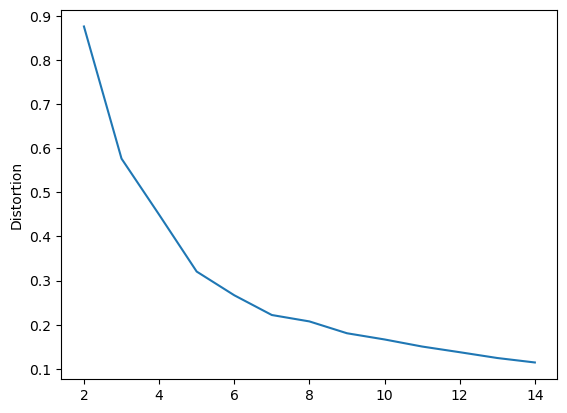

In [5]:
distortions = []  
K=range(2,15)
for k in range(2,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    distortions.append(sum(np.min(cdist(features,kmeans.cluster_centers_,
'euclidean'),axis=1)) / features.shape[0]) 
plt.plot(list(range(2,15)), distortions)  
plt.ylabel('Distortion') 
plt.show()

Trực quan hoá dữ liệu sau khi phân cụm

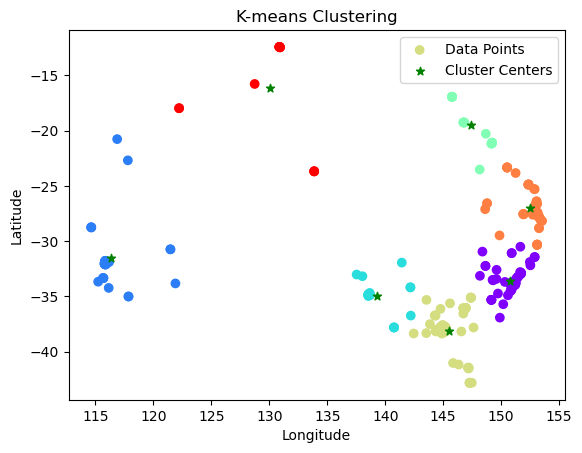

In [10]:
# Lấy các đặc trưng cần giảm chiều
features = data[['Longitude', 'Latitude']]

# Khởi tạo mô hình phân cụm K-means với số cụm cần tạo
kmeans = KMeans(n_clusters= 7)

kmeans.fit(features)
data['Cluster'] = kmeans.labels_
selected_columns = data[['CustomerName', 'Cluster']]

# Lưu kết quả vào file answer_task1.xlsx
file_name = 'answer_task1.xlsx'
selected_columns.to_excel(file_name, index=False)

# Trực quan dữ liệu
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='rainbow', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='green', marker='*', label='Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')
plt.legend()
plt.show()